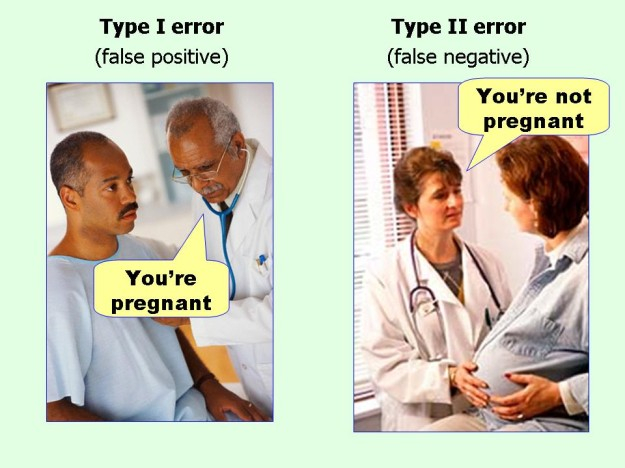

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [3]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )
print( minnesota_ages.std() )

43.000112
39.26
10.170172073273882


# t statistics

In [3]:
stats.ttest_1samp(a = minnesota_ages,               # Sample data
                 popmean = population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

# t critical

In [7]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom            

-2.0095752344892093

In [6]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

# p - value

In [8]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Multiply by two for two tailed test *

0.013121066545690117

# Confidence Interval

In [9]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

In [10]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.40547994092107, 43.11452005907893)

#Type I and Type II Errors

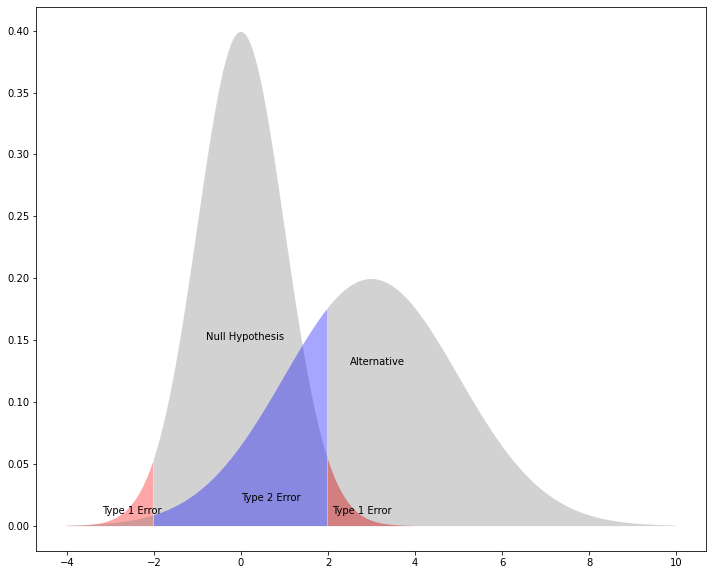

In [11]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");


# Type II error and statistical power

In [12]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

# Sample size and Effect size

In [13]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.5,
               alpha = 0.05,
               power = 0.8)

33.3671314275208